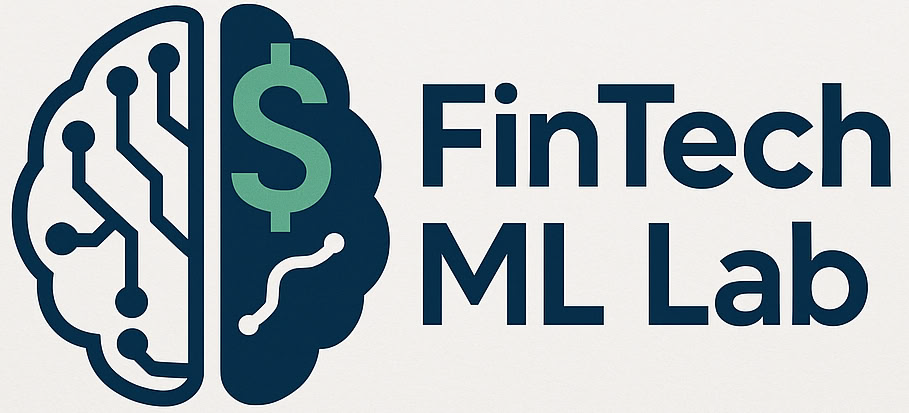

## Episode 3: Fraud Detection with XGBoost | ML Fintech Labs

**What is fraud detection?**

![image-5.png](attachment:image-5.png)

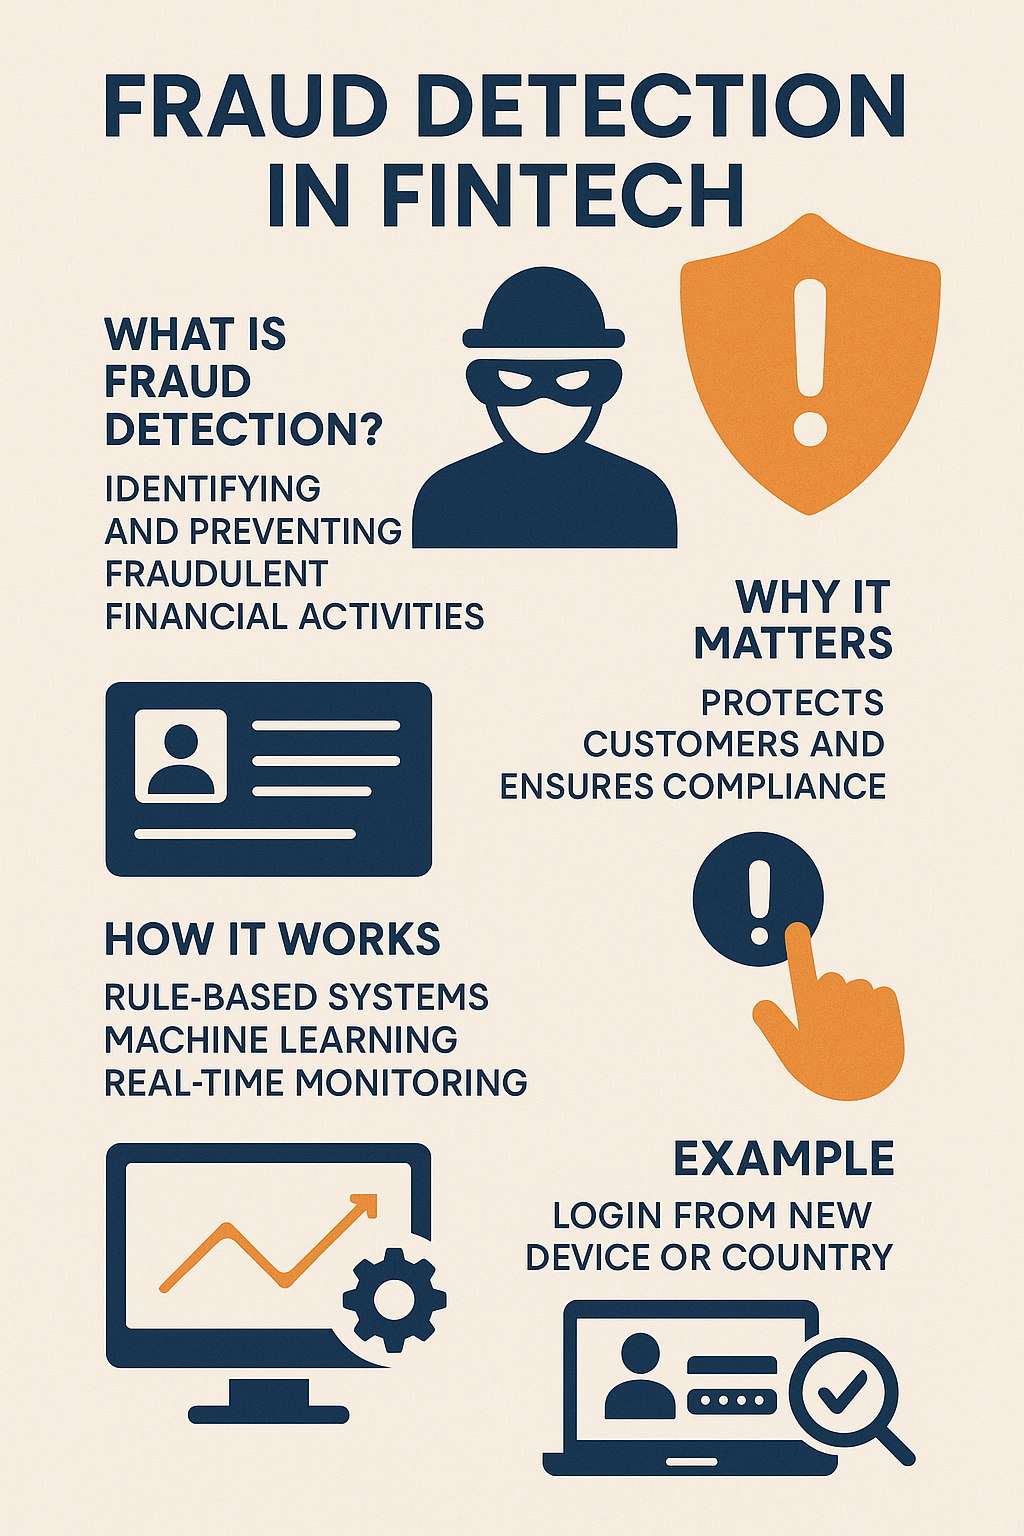

**What is classification algorithm?**

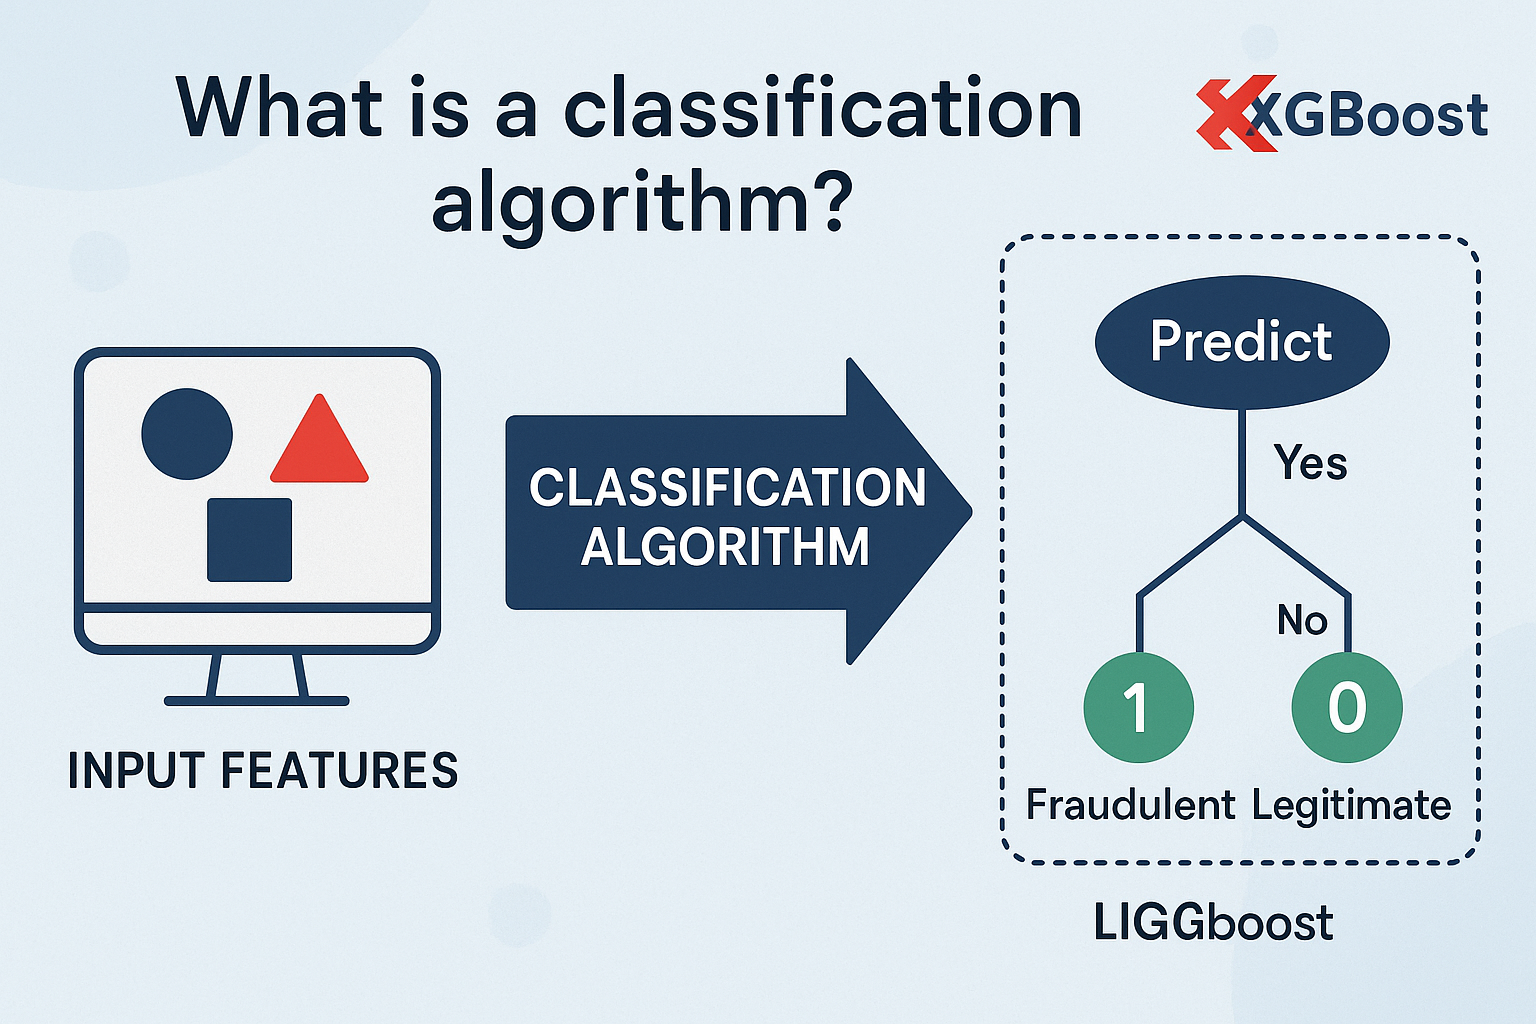

#### Let's get started

### Dataset Overview

Download the <a href="https://www.kaggle.com/competitions/ieee-fraud-detection/data">IEEE-CIS-FRAUD-DATASET</a> from kaggle and move it in your project directory manually.

#### Extract the dataset

You can also use a simplified version of the IEEE Fraud Dataset by downloading as following:

In [ ]:
# To install gdown, uncomment below line and run the cell
#%pip install gdown

In [23]:
import gdown
# File ID from Google Drive share link
file_id = '1PaIZ1U2f6fDOvI75s52-xLQH5C9yNCxv'

url = f'https://drive.google.com/uc?id={file_id}'

output = '../data/ieee_fraud_data.parquet'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PaIZ1U2f6fDOvI75s52-xLQH5C9yNCxv
To: /content/ieee_fraud_data.parquet
100%|██████████| 49.9M/49.9M [00:00<00:00, 84.2MB/s]


'ieee_fraud_data.parquet'

### Step 0: Load the dataset

In [25]:
import pandas as pd

# Load the dataset

df = pd.read_parquet('../data/ieee_fraud_data.parquet', engine='pyarrow')

In [5]:
# Set maximum number of columns to display
pd.set_option("display.max_columns", 300)

# Explore the few rows
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2 P_emaildomain   C1  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0          None  1.0   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0     gmail.com  1.0   
2  490.0  150.0        visa  166.0   debit  330.0   87.0   outlook.com  1.0   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0     yahoo.com  2.0   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0     gmail.com  1.0   

    C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0   
3  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0   

     D4   D10    D15    M6  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  \
0   NaN  13.0    0.0     T  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
1   0.0   0.0    0.0     T  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2   0.0   0.0  315.0     F  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  94.0  84.0  111.0     F  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
4   NaN   NaN    NaN  None  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  \
0  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V82  V83  V84  V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95   V96  \
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
1  1.0  1.0  0.0  0.0  1.0  1

In [6]:
# Set the TransactionID to index
df.set_index('TransactionID', inplace=True)

### Step 1: Understand the structure of the dataset

Let’s start by checking the shape of the dataset:

In [7]:
# Check the number of rows and columns
df.shape

(590528, 201)

Next, we examine the data types of each column:


In [8]:
# View column names and their data types
pd.set_option("display.max_rows", 1000)
# df.shape
df.dtypes.value_counts() # count the number of types in the dataset

float32    193
object       5
int32        3
Name: count, dtype: int64

To get a quick overview of the data, including non-null counts, types, and memory usage, we can use:

In [9]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 590528 entries, 2987000 to 3577539
Columns: 201 entries, isFraud to V321
dtypes: float32(193), int32(3), object(5)
memory usage: 466.3+ MB


### Step 3: Data Cleaning and Preprocessing

We will handle missing values, reduce memory usage, and convert data types.

In [10]:
# Total number of rows
total_rows = df.shape[0]
total_rows

590528

In [11]:
def check_missing(df, dtype='object'):
    # Total number of rows
    total_rows = df.shape[0]

    # Check missing values and their percentage for specified dtype
    missing_ = df.select_dtypes(include=dtype).isnull().sum()
    missing_percent = (missing_ / total_rows) * 100

    # Combine into a DataFrame for better readability
    missing_summary = pd.DataFrame({
        'Missing Values': missing_,
        'Missing Percentage (%)': missing_percent.round(2)
    })

    # Filter out columns without missing values
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

    # Sort by missing percentage
    return missing_summary.sort_values(by='Missing Percentage (%)', ascending=False)



In [12]:
# For numeric types
check_missing(df, dtype=['float32', 'int32'])

Missing Values  Missing Percentage (%)
V52            168957                   28.61
V51            168957                   28.61
V37            168957                   28.61
V38            168957                   28.61
V39            168957                   28.61
V40            168957                   28.61
V41            168957                   28.61
V42            168957                   28.61
V43            168957                   28.61
V44            168957                   28.61
V45            168957                   28.61
V46            168957                   28.61
V47            168957                   28.61
V48            168957                   28.61
V49            168957                   28.61
V50            168957                   28.61
V35            168957                   28.61
V36            168957                   28.61
D4             168910                   28.60
V86             89153                   15.10
V87             89153                   15.10
V88             89153                   15.10
V89             89153                   15.10
V90             89153                   15.10
V75             89153                   15.10
V76             89153                   15.10
V83             89153                   15.10
V84             89153                   15.10
V82             89153                   15.10
V81             89153                   15.10
V93             89153                   15.10
V94             89153                   15.10
V91             89153                   15.10
V92             89153                   15.10
V85             89153                   15.10
V79             89153                   15.10
V78             89153                   15.10
V77             89153                   15.10
V80             89153                   15.10
D15             89102                   15.09
V58             77094                   13.06
V57             77094                   13.06
V65             77094                   13.06
V66             77094                   13.06
V63             77094                   13.06
V64             77094                   13.06
V54             77094                   13.06
V53             77094                   13.06
V67             77094                   13.06
V68             77094                   13.06
V72             77094                   13.06
V71             77094                   13.06
V69             77094                   13.06
V70             77094                   13.06
V74             77094                   13.06
V73             77094                   13.06
V59             77094                   13.06
V60             77094                   13.06
V61             77094                   13.06
V62             77094                   13.06
V55             77094                   13.06
V56             77094                   13.06
V25             76062                   12.88
V26             76062                   12.88
V21             76062                   12.88
V22             76062                   12.88
V19             76062                   12.88
V18             76062                   12.88
V12             76062                   12.88
V17             76062                   12.88
V16             76062                   12.88
V15             76062                   12.88
V14             76062                   12.88
V13             76062                   12.88
V20             76062                   12.88
V31             76062                   12.88
V29             76062                   12.88
V30             76062                   12.88
V34             76062                   12.88
V33             76062                   12.88
V23             76062                   12.88
V24             76062                   12.88
V32             76062                   12.88
V27             76062                   12.88
V28             76062                   12.88
D10             76011                   12.87
addr1

In [13]:
# For categorical
check_missing(df, dtype='object')

Missing Values  Missing Percentage (%)
M6                     169348                   28.68
P_emaildomain           94454                   15.99
card6                    1571                    0.27
card4                    1577                    0.27

**Handle Missing Values**


Impute Numerical Features with Mean or Median:

You can choose between mean or median based on your preference or the data distribution:

In [32]:
# Fill numeric columns with median
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
  median = df[col].median()
  df.fillna({col:median}, inplace=True)


For categorical features:

In [27]:
# Fill categorical columns with most frequent value (mode)
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
  mode = df[col].mode(dropna=True)
  if not mode.empty:
    df.fillna({col:mode[0]}, inplace=True)

**Confirm the Result**

In [33]:
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2 P_emaildomain   C1  \
0  361.0  150.0    discover  142.0  credit  315.0   87.0     gmail.com  1.0   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0     gmail.com  1.0   
2  490.0  150.0        visa  166.0   debit  330.0   87.0   outlook.com  1.0   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0     yahoo.com  2.0   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0     gmail.com  1.0   

    C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0   
3  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0   

     D4   D10    D15 M6  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  \
0  26.0  13.0    0.0  T  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
1   0.0   0.0    0.0  T  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2   0.0   0.0  315.0  F  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  94.0  84.0  111.0  F  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
4  26.0  15.0   52.0  F  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   

   V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   

   V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  \
0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   

   V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   

   V82  V83  V84  V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95   V96  \
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0 

In [34]:
df.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
addr2             0
P_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D4                0
D10               0
D15               0
M6                0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22               0
V23               0
V24               0
V25               0
V26               0
V27               0
V28               0
V29               0
V30               0
V31               0
V32               0
V33               0
V34               0
V35               0
V36               0
V37               0
V38               0
V39               0
V40               0
V41               0
V42               0
V43               0
V44               0
V45               0
V46               0
V47               0
V48               0
V49               0
V50               0
V51               0
V52               0
V53               0
V54               0
V55               0
V56               0
V57               0
V58               0
V59               0
V60               0
V61               0
V62               0
V63               0
V64               0
V65               0
V66               0
V67               0
V68               0
V69               0
V70               0
V71               0
V72               0
V73               0
V74               0
V75               0
V76               0
V77               0
V78               0
V79               0
V80               0
V81               0
V82               0
V83               0
V84               0
V85               0
V86               0
V87               0
V88               0
V89               0
V90               0
V91               0
V92               0
V93               0
V94               0
V95               0
V96               0
V97               0
V98               0
V99               0
V100              0
V101              0
V102              0
V103              0
V104              0
V105              0
V106              0
V107              0
V108              0
V109              0
V110              0
V111              0
V112              0
V113              0
V114              0
V115              0
V116              0
V117              0
V118              0
V119              0
V120              0
V121              0
V122              0
V123              0
V124              0
V125              0
V126              0
V127              0
V128              0
V129              0
V130              0
V131              0
V132              0
V133              0
V134              0
V135              0
V136              0
V137              0
V279              0
V280              0
V281              0
V282              0
V283              0
V284              0
V285              0
V286              0
V287              0
V288              0
V289              0
V290              0
V291              0
V292              0
V293              0
V294              0
V295              0
V296              0
V297              0
V298              0
V299              0
V300              0
V301              0
V302              0
V303              0
V304              0
V305              0
V306              0
V307              0
V308              0
V309              0
V310              0
V311              0
V312              0
V313              0
V314              0
V315              0
V316              0
V317              0
V318              0
V319              0


**Identify Highly correlated numeric variables**

Important to:

    • Remove redundant features

    • Reduce multicollinearity
    
    • Improve model efficiency

**Compute correlation matrix**

In [35]:
# Compute the correlation matrix (for numerical columns only)
corr_matrix = df.select_dtypes(include=['number']).corr()

In [36]:
import numpy as np

def get_high_correlations(corr_matrix, threshold=0.9):
	# Take the upper triangle of the correlation matrix without the diagonal
	upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

	# Find features with correlation greater than the threshold
	high_corr = [(col, row, upper.loc[row, col])
	for col in upper.columns
	for row in upper.index
	if abs(upper.loc[row, col]) > threshold]

	return sorted(high_corr, key=lambda x: -abs(x[2]))

In [37]:
# Then call it
high_corr_pairs = get_high_correlations(corr_matrix, threshold=0.9)
for feature1, feature2, corr_value in high_corr_pairs[:10]:
  print(f"{feature1} ↔ {feature2} = {corr_value:.2f}")

V101 ↔ V95 = 1.00
V293 ↔ V279 = 1.00
C12 ↔ C7 = 1.00
V293 ↔ V101 = 1.00
V103 ↔ V97 = 1.00
V279 ↔ V95 = 1.00
V295 ↔ V280 = 1.00
V293 ↔ V95 = 1.00
V279 ↔ V101 = 1.00
TransactionDT ↔ TransactionID = 1.00


**Drop Redundant Features (Optional)**

If feature1 and feature2 are highly correlated, drop one of them:

In [ ]:
# Uncomment, and run below code to drop one of the correlated features
"""
to_drop = set()
for feature1, feature2, _ in high_corr_pairs:
	if feature1 not in to_drop:
	  to_drop.add(feature2)

df.drop(columns=list(to_drop), inplace=True)
"""

Note that:

    • Focus only on numerical features when checking for correlation.
    
    • Always verify feature importance before dropping anything blindly.

**Encoding Categorical features**

- Checking cardinality

In [39]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Count unique values in each categorical column
cardinality = df[cat_cols].nunique().sort_values(ascending=False)

# Display the result
print(cardinality)

P_emaildomain    59
ProductCD         5
card4             4
card6             4
M6                2
dtype: int64


In [40]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for high-cardinality feature
le = LabelEncoder()
df['P_emaildomain'] = le.fit_transform(df['P_emaildomain'])

# One-Hot Encoding for low-cardinality features
df = pd.get_dummies(df, columns=['ProductCD', 'card4', 'card6', 'M6'], drop_first=True)

In [41]:
# Explore few rows again
df.head()

isFraud  TransactionDT  TransactionAmt  card1  card2  card3  card5  addr1  \
0        0          86400            68.5  13926  361.0  150.0  142.0  315.0   
1        0          86401            29.0   2755  404.0  150.0  102.0  325.0   
2        0          86469            59.0   4663  490.0  150.0  166.0  330.0   
3        0          86499            50.0  18132  567.0  150.0  117.0  476.0   
4        0          86506            50.0   4497  514.0  150.0  102.0  420.0   

   addr2  P_emaildomain   C3   C9  C12   C13  C14     D1    D4   D10    D15  \
0   87.0             16  0.0  1.0  0.0   1.0  1.0   14.0  26.0  13.0    0.0   
1   87.0             16  0.0  0.0  0.0   1.0  1.0    0.0   0.0   0.0    0.0   
2   87.0             35  0.0  1.0  0.0   1.0  1.0    0.0   0.0   0.0  315.0   
3   87.0             53  0.0  1.0  0.0  25.0  1.0  112.0  94.0  84.0  111.0   
4   87.0             16  0.0  0.0  0.0   1.0  1.0    0.0  26.0  15.0   52.0   

   V13  V14  V20  V22  V23  V24  V25  V26  V28  V32  V36  V37  V38  V40  V41  \
0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0   
1  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0   
2  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0   
3  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0   
4  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0   

   V43  V45  V46  V47  V49  V54  V55  V56  V61  V62  V64  V65  V66  V67  V68  \
0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
1  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
3  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
4  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   

   V72  V74  V76  V77  V78  V81  V82  V83  V85  V86  V87  V88  V89  V91  V93  \
0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   

   V94  V98   V99  V100  V107  V108  V109  V110  V112  V113  V114  V115  V116  \
0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3  0.0  0.0  10.0   4.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V117  V118  V119  V120  V121  V122  V123  V124  V125   V130   V131  V137  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    0.0    0.0   0.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    0.0    0.0   0.0   
2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    0.0    0.0   0.0   
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  354.0  135.0   0.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0    0.0    0.0   0.0   

   V281  V282  V283  V284  V285  V286  V287  V288  V289  V290  V292  V297  \
0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   
1   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   
2   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   
3   0.0   0.0   0.0   0.0  10.0   0.0   4.0   0.0   0.0   1.0   1.0   0.0   
4   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   

   V299  V301  V304  V305  V309   V310  V311   V312  V314  V315   V318  V321  \
0   0.0   0.0   0.0   1.0   0.0    0.0   0.0    0.0   0.0   0.0    0.0   0.0   
1   0.0   0.0   0.0

**Check imbalanced**

check the distribution of the target variable, `isFraud`.

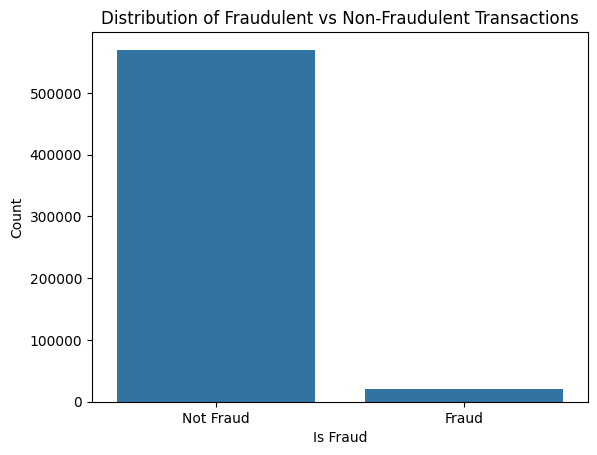

isFraud
0    96.500928
1     3.499072
Name: proportion, dtype: float64


In [42]:
# Visualize class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

# Print percentage distribution
fraud_rate = df['isFraud'].value_counts(normalize=True) * 100
print(fraud_rate)

### Step 3: Model Training and Evaluation

**1: Prepare the Feature Data**

In [44]:
# Separate features and target
X = df.drop(columns=['isFraud'])
y = df['isFraud']


**2: Train-Test Split**

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

**3: Model Pipeline with XGBoost**

train the XGBoost model using the training data

In [46]:
# Import Required Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier


In [47]:
# Define the Classifier
classifier = XGBClassifier(eval_metric='logloss', random_state=42)


**Create the Training Pipeline**

Now, we construct our machine learning pipeline using `ImbPipeline` from the `imblearn` library.

In [53]:
# Create pipeline
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', classifier)
])

**Train the Model**

With our pipeline fully defined, we now train the model using the training data:

In [54]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

**Predict and Evaluate**

Now that the model is trained, we predict on the test set:

In [50]:
y_pred = pipeline.predict(X_test)


**Evaluate the mode performance**

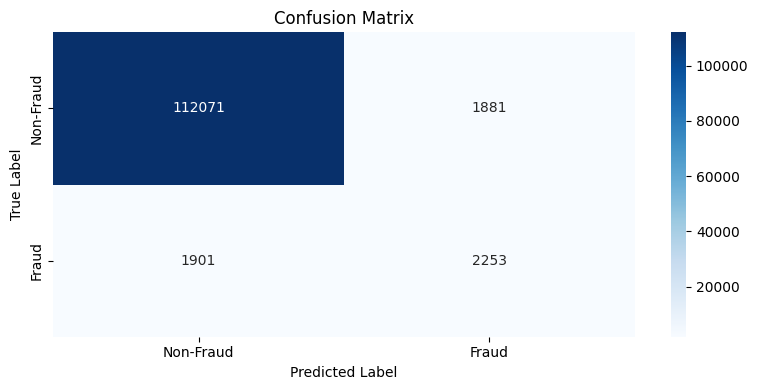

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix values from your result
cm = confusion_matrix(y_test, y_pred)

# Labels for display
labels = ["Non-Fraud", "Fraud"]

# Plot the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [59]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    113952
           1       0.54      0.54      0.54      4154

    accuracy                           0.97    118106
   macro avg       0.76      0.76      0.76    118106
weighted avg       0.97      0.97      0.97    118106

